Student Name : BADDELA RAJU    

Student Id : A00039717

colab link : https://colab.research.google.com/drive/102iCjEnamkh8BFBgJsG6JyUnwlthe-Wg?usp=sharing

Dataset : Downloaded from Yahoo finance library

## **Stock Price Prediction**

Stock price prediction is a crucial task in financial markets, leveraging historical data and machine learning techniques to forecast future prices. This notebook explores stock price prediction using various analytical and deep learning models. The dataset consists of historical stock prices, including open, close, high, low, and volume features.

I implement Exploratory Data Analysis (EDA) to understand trends, patterns, and correlations in stock price movements. Advanced deep learning models such as LSTM (Long Short-Term Memory) networks are employed for time-series forecasting, enhancing predictive accuracy.

The goal is to build a reliable model that can provide insights into future stock price trends, aiding investors and analysts in making informed decisions.



# Importing Libraries

In [1]:
# Install yfinance for fetching stock data
!pip install yfinance
# Install seaborn for enhanced visualizations
!pip install seaborn

!pip install tensorflow
!pip install statsmodels
from tensorflow import keras

# Import necessary libraries
import yfinance as yf  # Fetch stock data
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Enhanced visualizations
from sklearn.preprocessing import MinMaxScaler  # Data normalization
from tensorflow.keras.models import Sequential  # Model building
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping for training optimization
from sklearn.metrics import mean_absolute_error # Import mean_absolute_error for model evaluation
from tensorflow.keras.layers import Dense, LSTM, Dropout # Model layers
from tensorflow.keras.callbacks import EarlyStopping # Training optimization
# Import the 'date' object from the 'datetime' module
from datetime import date

# Install Keras Tuner for hyperparameter tuning
!pip install keras-tuner --quiet
# Install Streamlit for creating web apps
!pip install streamlit --quiet

# Import Keras Tuner
import keras_tuner as kt
# Import Streamlit
import streamlit as st
!pip install visualkeras  ## To display the model

import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 28.0 MB/s eta 0:00:00


# Data Collection and Preparation

## **About the Yahoo Finance Dataset**
Yahoo Finance is a popular source for stock market data, offering historical records for various stocks, indices, and cryptocurrencies. The dataset contains key financial indicators such as:  
- **Date:** The trading date.  
- **Open:** The stock's price at market opening.  
- **High & Low:** The highest and lowest prices during the trading session.  
- **Close:** The stock's price at market close.  
- **Adj Close:** Adjusted closing price after splits and dividends.  
- **Volume:** The total number of shares traded.  
  

By leveraging Yahoo Finance data, this project aims to enhance the accuracy of stock price forecasting through data-driven insights.

In [2]:
# Define stock ticker
ticker_symbol = "TCS.NS"

# Get today's date
today = date.today()
today_str = today.strftime("%Y-%m-%d")

# Fetch historical stock data
data = yf.download(ticker_symbol, start="2010-01-01", end=today_str)

df=data

# Save the data to a CSV file
df.to_csv("TCS.csv")

# Display first few rows
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2010-01-04,288.825562,291.611413,287.826483,290.035952,1963682
2010-01-05,288.902435,291.861207,286.865886,290.112849,2014488
2010-01-06,282.370056,289.036901,281.659193,288.902398,3349176
2010-01-07,274.511993,284.118376,273.205516,282.619771,6474892
2010-01-08,268.901917,276.087497,267.633878,275.126858,6048178


In [3]:
df = pd.read_csv('TCS.csv', header=None)  # Read without header
df.to_csv('TCS_no_header.csv', index=False, header=False)

In [4]:
df=pd.read_csv('TCS_no_header.csv',skiprows=2) # Read data, skipping first 2 rows
df.head() # Display the first few rows of the DataFrame

,Date,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2010-01-04,288.825562,291.611413,287.826483,290.035952,1963682
1,2010-01-05,288.902435,291.861207,286.865886,290.112849,2014488
2,2010-01-06,282.370056,289.036901,281.659193,288.902398,3349176
3,2010-01-07,274.511993,284.118376,273.205516,282.619771,6474892
4,2010-01-08,268.901917,276.087497,267.633878,275.126858,6048178


In [5]:
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume'] # Assign column names
df = df.set_index('Date') # Set 'Date' column as index
df.head() # Display the first few rows of the DataFrame

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,288.825562,291.611413,287.826483,290.035952,1963682
2010-01-05,288.902435,291.861207,286.865886,290.112849,2014488
2010-01-06,282.370056,289.036901,281.659193,288.902398,3349176
2010-01-07,274.511993,284.118376,273.205516,282.619771,6474892
2010-01-08,268.901917,276.087497,267.633878,275.126858,6048178


In [6]:
### Display the last few rows of the DataFrame
df.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2025-03-28,3606.149902,3660.949951,3591.899902,3651.000000,2051919
2025-04-01,3550.800049,3584.000000,3525.000000,3572.699951,2618493
2025-04-02,3543.949951,3564.100098,3530.050049,3544.000000,1764313
2025-04-03,3403.149902,3502.000000,3396.149902,3491.000000,4537821
2025-04-04,3299.399902,3399.649902,3295.500000,3362.600098,5317367


# Exploratory Data Analysis (EDA)

In [7]:
# Check for missing values in each column
df.isnull().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [8]:
 # Get data types and missing values
 df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3766 entries, 2010-01-04 to 2025-04-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3766 non-null   float64
 1   High    3766 non-null   float64
 2   Low     3766 non-null   float64
 3   Open    3766 non-null   float64
 4   Volume  3766 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.5+ KB


In [9]:
  # Get summary statistics
  df.describe()

,Close,High,Low,Open,Volume
count,3766.000000,3766.000000,3766.000000,3766.000000,3.766000e+03
mean,1731.791640,1749.505145,1714.615007,1732.413283,2.741931e+06
std,1191.162607,1201.892729,1181.246704,1191.662493,2.190062e+06
min,268.901917,275.085896,264.009178,270.515741,0.000000e+00
25%,826.940140,839.441956,816.745552,826.980449,1.684527e+06
50%,1138.851501,1150.626069,1126.443209,1138.904780,2.293827e+06
75%,2974.874329,3007.835000,2944.339665,2977.784377,3.226166e+06
max,4471.390137,4509.193819,4430.395122,4493.237606,8.806715e+07


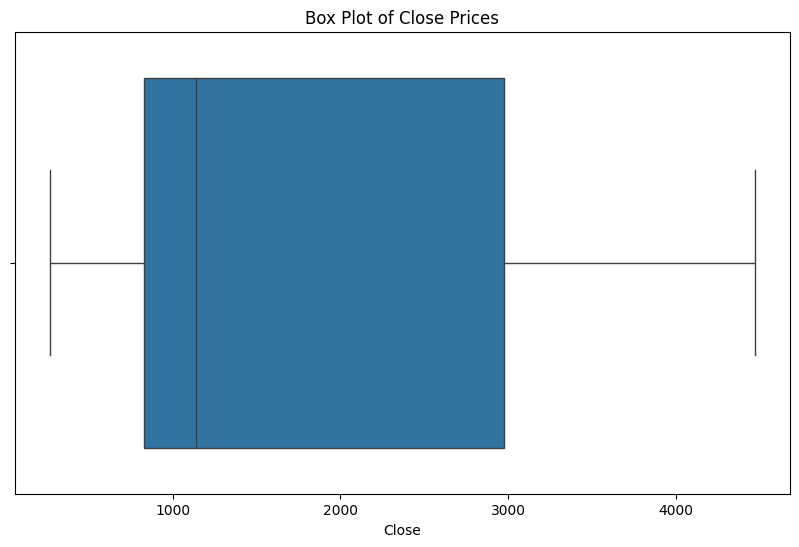

In [10]:
# Identify outliers using box plot
# Using box plot for 'Close' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Close']) # Create a box plot of the 'Close' column
plt.title('Box Plot of Close Prices') # Set the title of the plot
plt.show() # Display the plot

# Visualizations

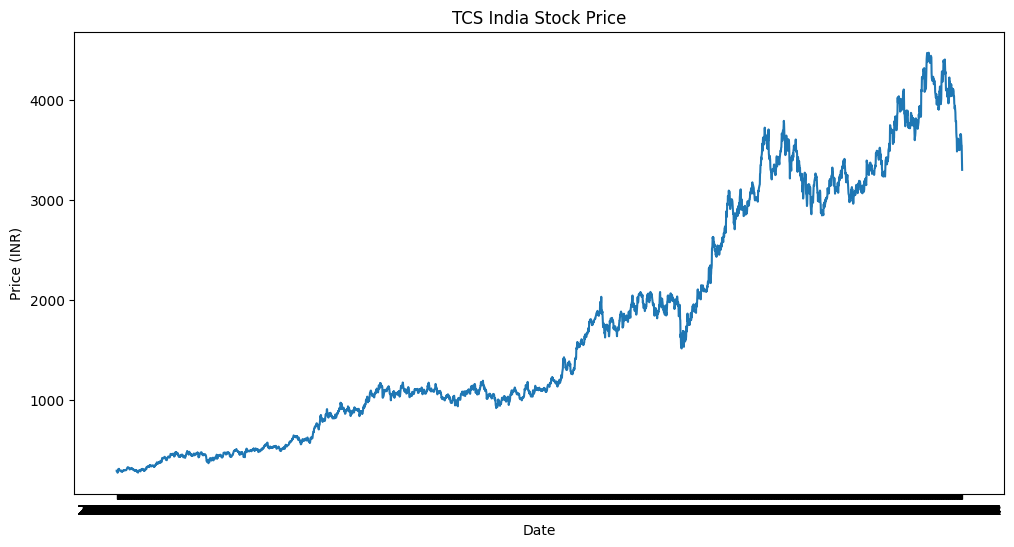

In [11]:

# Line plot of closing prices
plt.figure(figsize=(12, 6))
plt.plot(df['Close']) # Plot the 'Close' column
plt.title("TCS India Stock Price") # Set the title of the plot
plt.xlabel("Date") # Set the x-axis label
plt.ylabel("Price (INR)") # Set the y-axis label
plt.show() # Display the plot

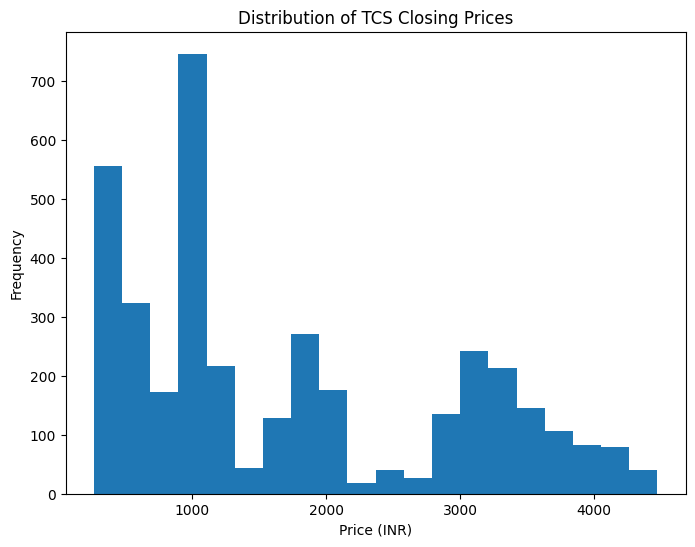

In [12]:
# Histogram of closing prices
plt.figure(figsize=(8, 6))
plt.hist(df['Close'], bins=20) # Create a histogram of the 'Close' column with 20 bins
plt.title("Distribution of TCS Closing Prices") # Set the title of the plot
plt.xlabel("Price (INR)") # Set the x-axis label
plt.ylabel("Frequency") # Set the y-axis label
plt.show() # Display the plot

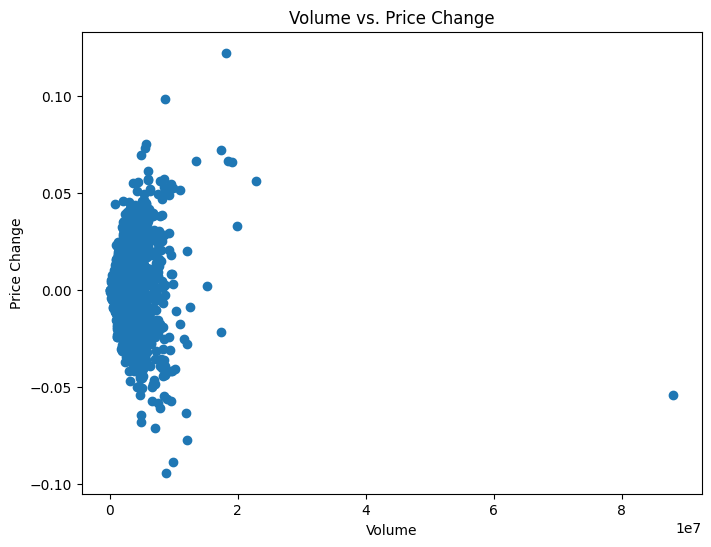

In [13]:
# Scatter plot of volume vs. price change
df['Price Change'] = df['Close'].pct_change()  # Calculate percentage change in price
plt.figure(figsize=(8, 6))
plt.scatter(df['Volume'], df['Price Change']) # Create a scatter plot of 'Volume' vs. 'Price Change'
plt.title("Volume vs. Price Change") # Set the title of the plot
plt.xlabel("Volume") # Set the x-axis label
plt.ylabel("Price Change") # Set the y-axis label
plt.show() # Display the plot

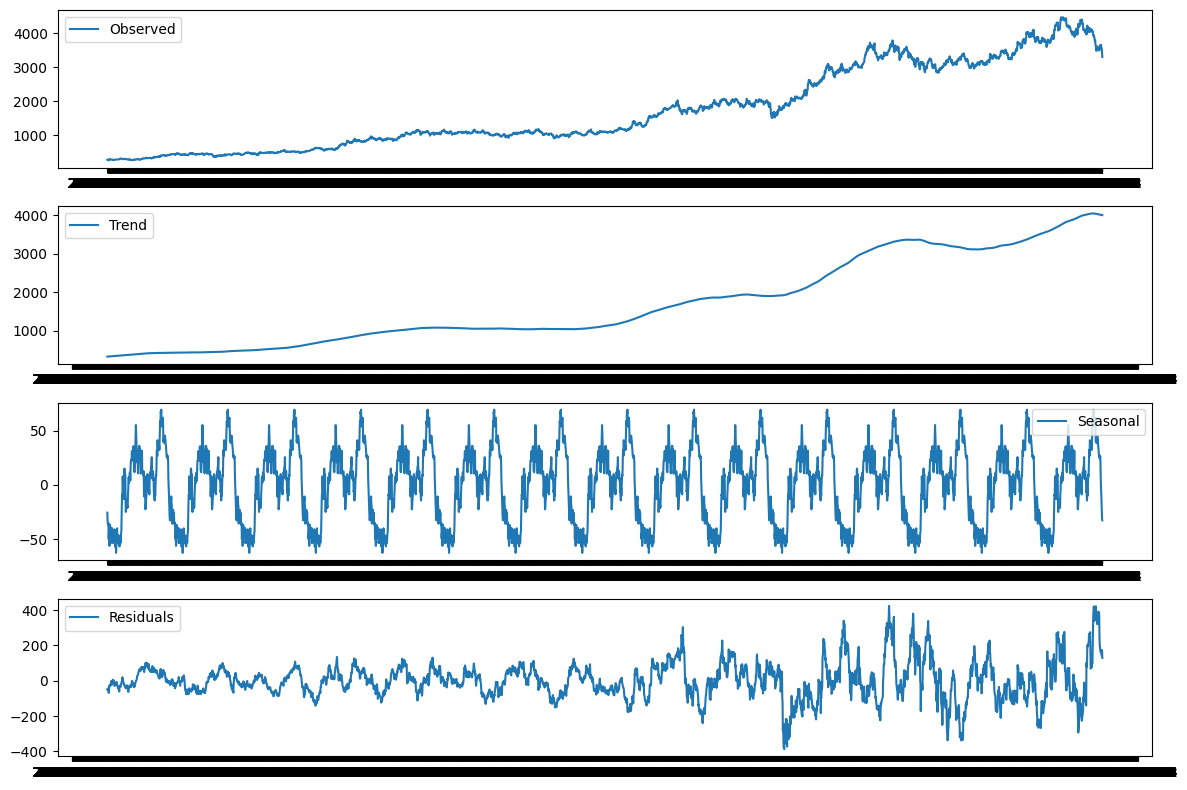

In [14]:
# Decompose time series into components
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the 'Close' price into trend, seasonality, and residuals
decomposition = seasonal_decompose(df['Close'], model='additive', period=252)  # Assuming 252 trading days in a year

# Plot the decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

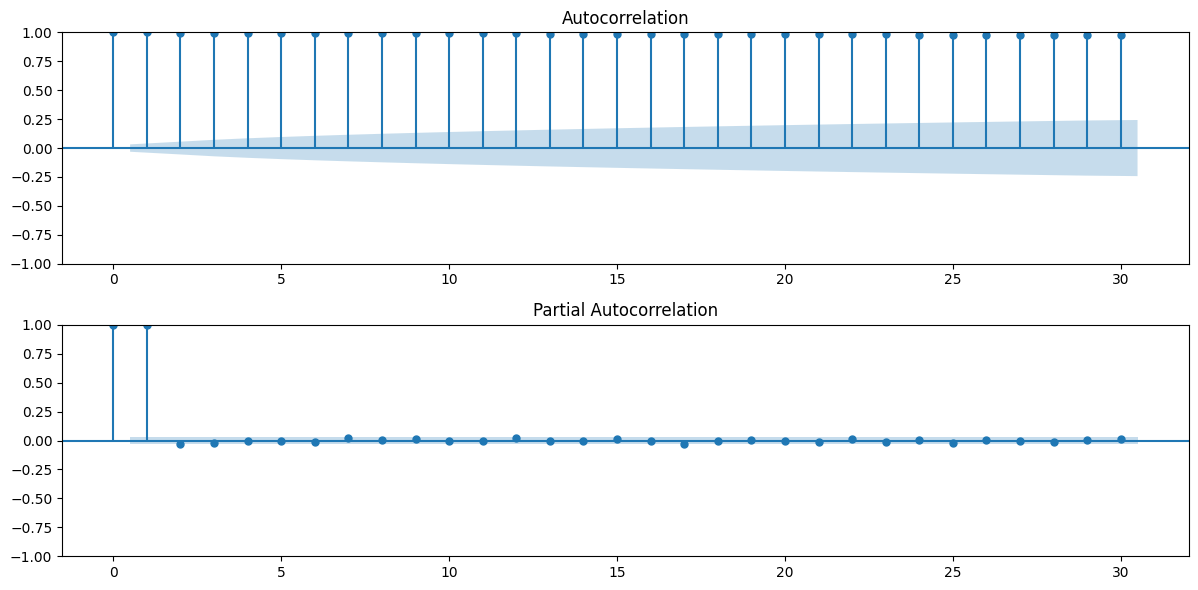

In [15]:
# Autocorrelation and Partial Autocorrelation plots
# Autocorrelation and Partial Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df['Close'], lags=30, ax=plt.gca())  # Autocorrelation Function
plt.subplot(212)
plot_pacf(df['Close'], lags=30, ax=plt.gca())  # Partial Autocorrelation Function
plt.tight_layout()
plt.show()

In [16]:
df

,Close,High,Low,Open,Volume,Price Change
Date,,,,,,
2010-01-04,288.825562,291.611413,287.826483,290.035952,1963682,NaN
2010-01-05,288.902435,291.861207,286.865886,290.112849,2014488,0.000266
2010-01-06,282.370056,289.036901,281.659193,288.902398,3349176,-0.022611
2010-01-07,274.511993,284.118376,273.205516,282.619771,6474892,-0.027829
2010-01-08,268.901917,276.087497,267.633878,275.126858,6048178,-0.020437
...,...,...,...,...,...,...
2025-03-28,3606.149902,3660.949951,3591.899902,3651.000000,2051919,-0.012338
2025-04-01,3550.800049,3584.000000,3525.000000,3572.699951,2618493,-0.015349
2025-04-02,3543.949951,3564.100098,3530.050049,3544.000000,1764313,-0.001929


In [17]:
ma100 = df.Close.rolling(100).mean() # Calculate 100-day moving average of 'Close' column
ma100 # Display the moving average

,Close
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
...,...
2025-03-28,3987.906721
2025-04-01,3984.324355
2025-04-02,3979.016897


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

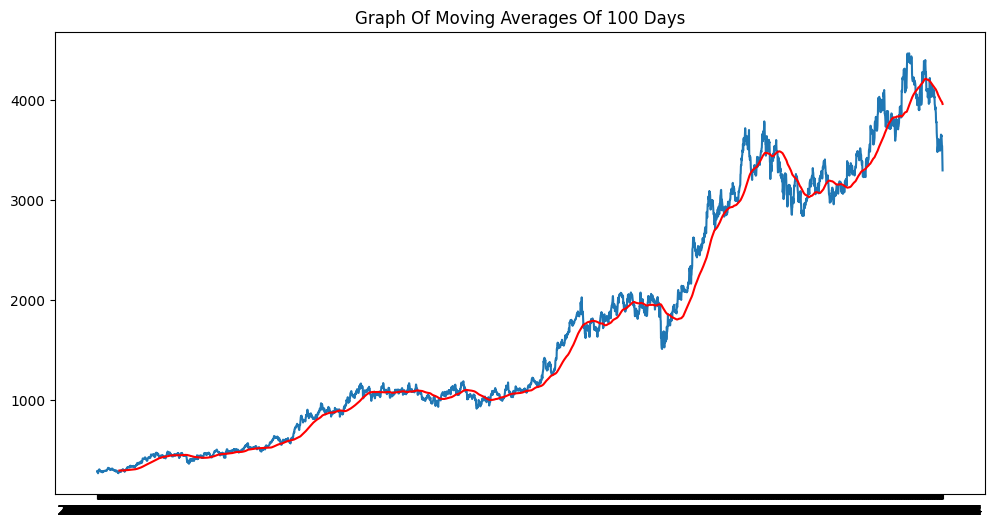

In [18]:
plt.figure(figsize = (12,6)) # Set the figure size
plt.plot(df.Close) # Plot the 'Close' column
plt.plot(ma100, 'r') # Plot the 100-day moving average in red
plt.title('Graph Of Moving Averages Of 100 Days') # Set the title of the plot

In [19]:
ma200 = df.Close.rolling(200).mean() # Calculate 200-day moving average of 'Close' column
ma200 # Display the moving average

,Close
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
...,...
2025-03-28,4060.875824
2025-04-01,4059.861664
2025-04-02,4058.585490


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

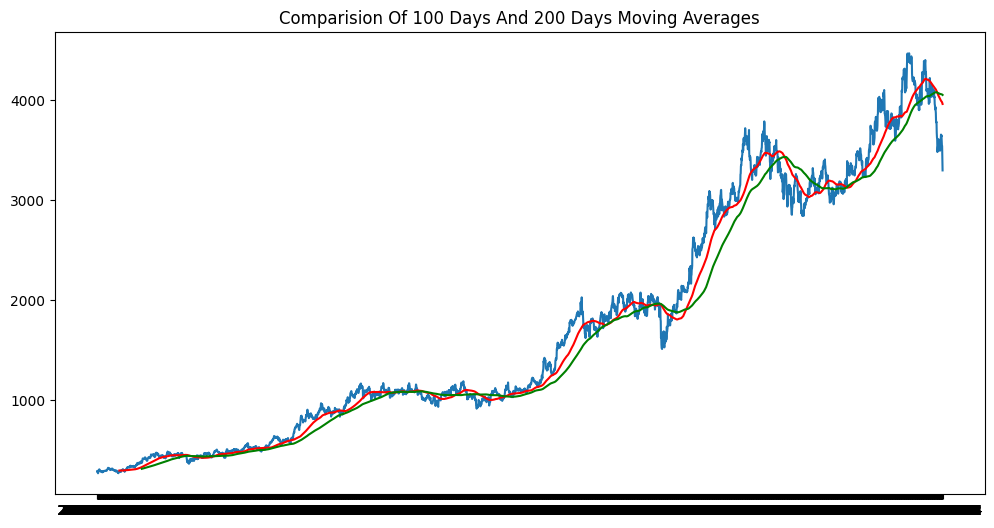

In [20]:
plt.figure(figsize = (12,6)) # Set the figure size
plt.plot(df.Close) # Plot the 'Close' column
plt.plot(ma100, 'r') # Plot the 100-day moving average in red
plt.plot(ma200, 'g') # Plot the 200-day moving average in green
plt.title('Comparision Of 100 Days And 200 Days Moving Averages') # Set the title of the plot

In [21]:
df.shape

(3766, 6)

# Data Splitting

In [22]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)]) # Create training set (70% of data)
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))]) # Create testing set (30% of data)

print(train.shape) # Print the shape of the training set
print(test.shape) # Print the shape of the testing set


(2636, 5)
(1130, 5)


In [23]:
#  Display the first few rows of the training set
train.head()

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2010-01-04,288.825562,291.611413,287.826483,290.035952,1963682
2010-01-05,288.902435,291.861207,286.865886,290.112849,2014488
2010-01-06,282.370056,289.036901,281.659193,288.902398,3349176
2010-01-07,274.511993,284.118376,273.205516,282.619771,6474892
2010-01-08,268.901917,276.087497,267.633878,275.126858,6048178


In [24]:
#  Display the first few rows of the testing set
test.head()

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2020-09-11,2204.960449,2213.226290,2164.141428,2164.884478,4145424
2020-09-14,2313.903076,2327.230818,2212.158017,2214.247719,7512131
2020-09-15,2313.903076,2357.183205,2289.012592,2313.903076,7318770
2020-09-16,2324.677002,2328.949372,2300.808011,2311.627931,3074003
2020-09-17,2285.623047,2317.943815,2276.010554,2303.315902,4828176


# Data Preprocessing

In [25]:
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler for data normalization
scaler = MinMaxScaler(feature_range=(0,1)) # Initialize MinMaxScaler with a range of 0 to 1

In [26]:
train_close = train['Close'].values
test_close = test['Close'].values

In [27]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.0104203 ],
       [0.0104605 ],
       [0.00704399],
       ...,
       [1.        ],
       [0.99001783],
       [0.99171788]])

In [28]:
## Create training data for LSTM
x_train = [] # Initialize an empty list to store input data for training
y_train = [] # Initialize an empty list to store output data for training

for i in range(100, data_training_array.shape[0]): # Iterate over the training data
    x_train.append(data_training_array[i-100: i]) # Append the previous 100 days' data to x_train
    y_train.append(data_training_array[i, 0]) # Append the current day's closing price to y_train

x_train, y_train = np.array(x_train), np.array(y_train) # Convert x_train and y_train to NumPy arrays

In [29]:
x_train.shape

(2536, 100, 1)

# Model Building and Training

# LSTM Model for Stock Price Prediction

## Why LSTM ??

Long Short-Term Memory (LSTM) networks are a special type of Recurrent Neural Network (RNN) specifically designed to handle sequential or time-series data — making them an excellent fit for stock price prediction. Below are the key reasons for using LSTM in this context:

## ⏳ 1. Time-Series Nature of Stock Data

Stock prices are inherently sequential — today's price is influenced by the prices of previous days. LSTM networks can capture these temporal dependencies effectively, whereas traditional feedforward networks (like standard MLPs) treat each input as independent.

## 🧠 2. Memory Capability

LSTMs have a unique internal structure that allows them to:

* Remember important trends over long periods
* Forget irrelevant patterns

This is especially useful in finance, where long-term trends (e.g., moving averages, seasonal effects) can significantly affect future prices.

## 💡 3. Handles Vanishing Gradient Problem

Standard RNNs often struggle with the vanishing gradient problem when trying to learn long-term dependencies. LSTM solves this using:

* Gates (input, forget, output) to control the flow of information
* Cell state that carries memory across many time steps

This makes LSTM more stable and effective for deep sequences like 100-day windows of stock prices.

## 📉 4. Better Forecasting Performance

Compared to linear regression, ARIMA models, or even simple RNNs:

* LSTM has shown superior performance in predicting volatile financial time-series
* It can learn nonlinear, complex dependencies and capture subtle market patterns

## 🔍 5. Adaptability to Noise and Volatility

Stock prices are noisy and volatile, and LSTMs can be trained to distinguish meaningful trends from random noise, especially when enhanced with dropout layers and good preprocessing.





## Model Architecture





## Layer-by-Layer Explanation

### First LSTM Layer

LSTM(50, activation='relu', return_sequences=True, input_shape=(100, 1))

* This layer processes sequences of 100 timesteps with one feature each.
* Using 50 units allows the model to learn essential time-based patterns.
* relu activation is used instead of traditional tanh to improve convergence and reduce vanishing gradients.
* return_sequences=True ensures the full sequence is passed to the next LSTM layer.

### Dropout Layer

Dropout(0.2)

* Randomly drops 20% of neurons to reduce overfitting and improve generalization.

### Second LSTM Layer

LSTM(60, activation='relu', return_sequences=True)

* Increased units allow deeper temporal pattern recognition.
* Continues passing the full sequence to the next layer.

### Dropout Layer

Dropout(0.3)

* Slightly higher dropout to combat increased model complexity.

### Third LSTM Layer

LSTM(80, activation='relu', return_sequences=True)

* Deepest layer with the highest capacity to capture long-term dependencies in the data.

### Dropout Layer

Dropout(0.4)

* Further regularization as the model becomes more expressive.

### Fourth LSTM Layer

LSTM(50, activation='relu')

* The final LSTM layer summarizes the temporal data into a single output vector.
* return_sequences=False by default — outputs only the last hidden state.

### Dropout Layer

Dropout(0.5)

* Highest dropout rate to ensure maximum regularization before final prediction.

### Dense Output Layer

Dense(1)

* Outputs a single continuous value — ideal for predicting the next stock price.

## Hyperparameter Summary

The model utilizes a progressive configuration of LSTM units across its layers — starting with 50 units, increasing to 60 and 80, and finally reducing back to 50. This design allows the network to initially expand its learning capacity to capture complex temporal features and then compress the learned information before passing it to the output layer. The dropout rates also increase with each LSTM layer: 0.2, 0.3, 0.4, and 0.5 respectively. This strategy helps prevent overfitting by introducing stronger regularization as the model depth increases.

The activation function used throughout the LSTM layers is ReLU (Rectified Linear Unit), which introduces non-linearity into the network and enables faster convergence during training. While traditional LSTMs often use the tanh activation, ReLU is chosen here to mitigate vanishing gradient issues and improve performance, especially in deeper architectures.

The input shape of the model is defined as (100, 1), meaning each training sample consists of 100 time steps with a single feature — typically the closing price of a stock. This setup enables the model to learn patterns and dependencies over a window of 100 days. Finally, the network concludes with a Dense layer containing a single neuron, which outputs a continuous value representing the predicted stock price for the next day.

In [30]:
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(100, 1)),
    Dropout(0.2),
    LSTM(60, activation='relu', return_sequences=True),
    Dropout(0.3),
    LSTM(80, activation='relu', return_sequences=True),
    Dropout(0.4),
    LSTM(50, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

In [31]:
## Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          26,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,411 (423.48 KB)

 Trainable params: 108,411 (423.48 KB)

 Non-trainable params: 0 (0.00 B)

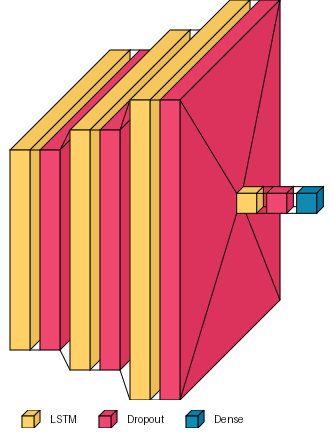

In [32]:
from visualkeras import layered_view
# Visualize the model using layered_view
layered_view(model, legend=True, max_xy=300)  # Save to file

In [33]:
import tensorflow as tf
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
history=model.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])  # Pass early_stopping to callbacks

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 154ms/step - loss: 0.0491 - mean_absolute_error: 0.1719 - val_loss: 0.0205 - val_mean_absolute_error: 0.1219
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - loss: 0.0082 - mean_absolute_error: 0.0651 - val_loss: 0.0039 - val_mean_absolute_error: 0.0511
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0069 - mean_absolute_error: 0.0585 - val_loss: 0.0038 - val_mean_absolute_error: 0.0509
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0046 - mean_absolute_error: 0.0488 - val_loss: 0.0043 - val_mean_absolute_error: 0.0542
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0048 - mean_absolute_error: 0.0488 - val_loss: 0.0035 - val_mean_absolute_error: 0.0470
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0043 - mean_absolute_error: 0.0462 - val_loss: 0.0030 - val_mean_absolute_error: 0.0444
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0039 - mean_absolute_error: 0.0443 - val_l

In [34]:
train_mae = history.history['mean_absolute_error'] # Get training MAE values from the history
val_mae = history.history['val_mean_absolute_error'] # Get validation MAE values from the history

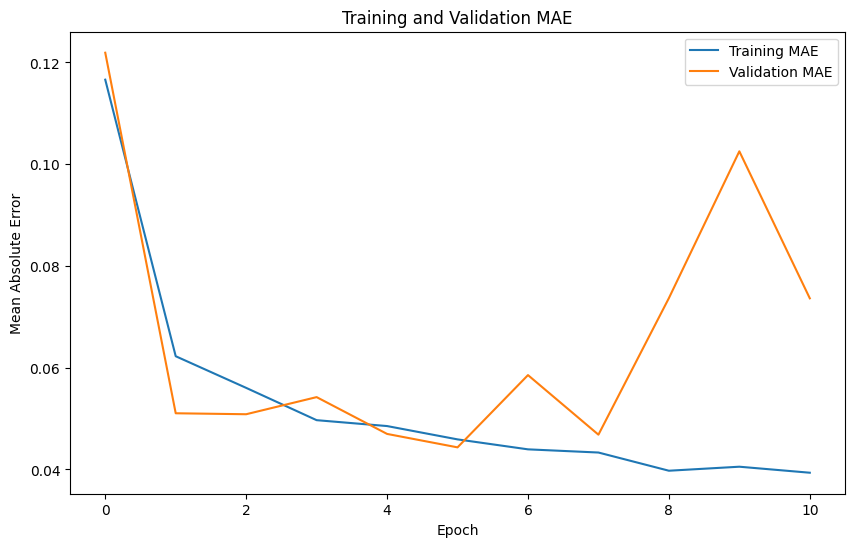

In [35]:
# Plot training and validation MAE
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(train_mae, label='Training MAE') # Plot training MAE
plt.plot(val_mae, label='Validation MAE') # Plot validation MAE
plt.title('Training and Validation MAE') # Set the title of the plot
plt.xlabel('Epoch') # Set the x-axis label
plt.ylabel('Mean Absolute Error') # Set the y-axis label
plt.legend() # Display legend
plt.show() # Display the plot

In [36]:
## Save the model
model.save('keras_model.h5')

In [37]:
test_close.shape

(1130, 1)

In [38]:
# Create a DataFrame for the last 100 days of training data
past_100_days = pd.DataFrame(train_close[-100:])

In [39]:
# Create a DataFrame for the testing data
test_df = pd.DataFrame(test_close)

In [40]:
# Concatenate past 100 days and testing data
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [41]:
# Display the first few rows of the final DataFrame
final_df.head()

,0
0,1634.949951
1,1735.431274
2,1680.270630
3,1696.948120
4,1717.691162


In [42]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.03542515],
       [0.01597801],
       ...,
       [0.67302671],
       [0.623387  ],
       [0.58680947]])

In [43]:
input_data.shape

(1230, 1)

In [44]:
#  Create testing data for LSTM
x_test = [] # Initialize an empty list to store input data for testing
y_test = [] # Initialize an empty list to store output data for testing
for i in range(100, input_data.shape[0]): # Iterate over the input data
   x_test.append(input_data[i-100: i]) # Append the previous 100 days' data to x_test
   y_test.append(input_data[i, 0]) # Append the current day's closing price to y_test

In [45]:
x_test, y_test = np.array(x_test), np.array(y_test) # Convert x_test and y_test to NumPy arrays
print(x_test.shape) # Print the shape of x_test
print(y_test.shape) # Print the shape of y_test

(1130, 100, 1)
(1130,)


In [46]:
# Making predictions

y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step


In [47]:
y_pred.shape

(1130, 1)

In [48]:
y_test

array([0.20095982, 0.23936804, 0.23936804, ..., 0.67302671, 0.623387  ,
       0.58680947])

In [49]:
y_pred

array([[0.17147249],
       [0.17259932],
       [0.17414656],
       ...,
       [0.68517333],
       [0.68292207],
       [0.6809847 ]], dtype=float32)

In [50]:
y_pred = scaler.inverse_transform(y_pred) # Inverse transform the predictions to get actual values
y_test = scaler.inverse_transform(y_test.reshape(-1,1)) # Inverse transform the actual values to get actual values

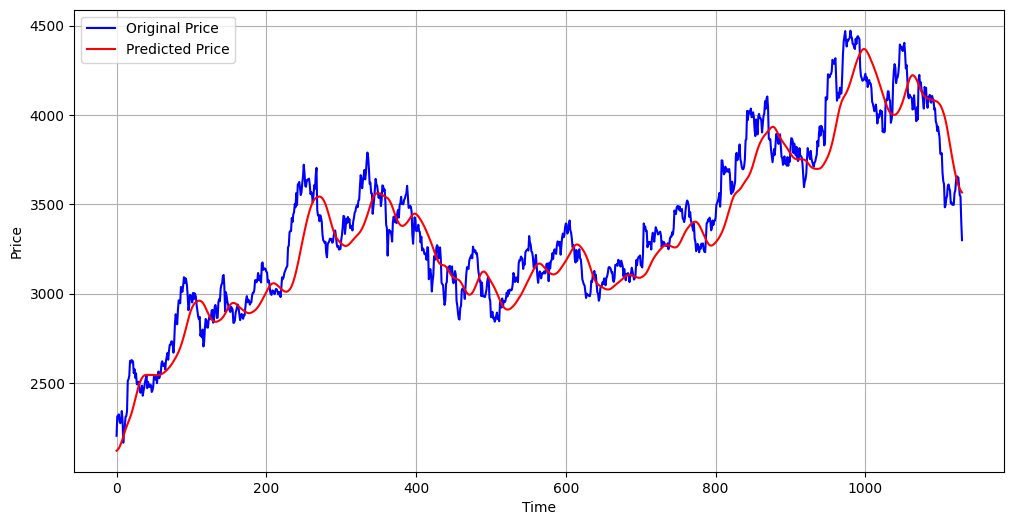

In [51]:
#  Plot original and predicted prices
plt.figure(figsize = (12,6)) # Set the figure size
plt.plot(y_test, 'b', label = "Original Price") # Plot the original prices in blue
plt.plot(y_pred, 'r', label = "Predicted Price") # Plot the predicted prices in red
plt.xlabel('Time') # Set the x-axis label
plt.ylabel('Price') # Set the y-axis label
plt.legend() # Display legend
plt.grid(True) # Display grid
plt.show() # Display the plot

# Model Evaluation

In [52]:
from sklearn.metrics import mean_absolute_error # Import mean_absolute_error for model evaluation

mae = mean_absolute_error(y_test, y_pred) # Calculate MAE between original and predicted prices
mae_percentage = (mae / np.mean(y_test)) * 100 # Calculate MAE as a percentage of the average original price
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage)) # Print the MAE percentage

Mean absolute error on test set: 3.74%


In [53]:

from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.8842780859450712


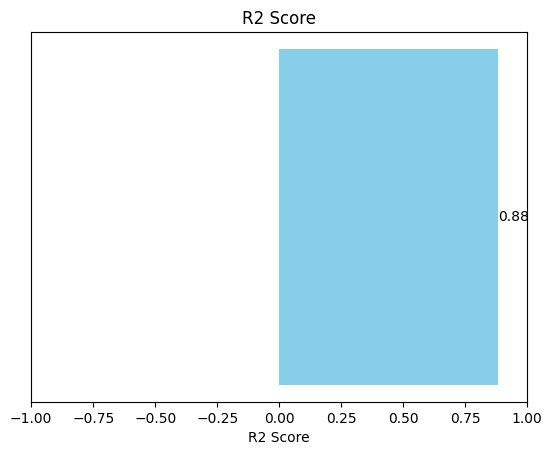

In [54]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

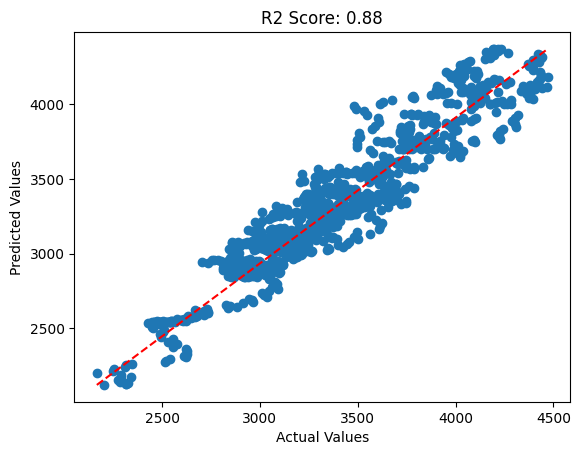

In [55]:
plt.scatter(actual, predicted) # Create a scatter plot of actual vs. predicted values
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--') # Plot a diagonal line
plt.xlabel('Actual Values') # Set the x-axis label
plt.ylabel('Predicted Values') # Set the y-axis label
plt.title(f'R2 Score: {r2:.2f}') # Set the title of the plot with the R2 score
plt.show() # Display the plot

# Hyperparameter Tuning

In [56]:
import keras_tuner as kt
import tensorflow as tf

def build_model(hp):
    model = tf.keras.Sequential()

    # Tune the number of LSTM layers
    num_layers = hp.Int('num_layers', min_value=1, max_value=4, step=1)

    # Add LSTM layers with tunable units and activation functions
    for i in range(num_layers):
        units = hp.Int(f'units_{i}', min_value=32, max_value=128, step=32)
        activation = hp.Choice(f'activation_{i}', values=['relu', 'tanh'])

        if i == 0:
            # Directly provide the input shape
            model.add(tf.keras.layers.LSTM(units=units, activation=activation,
                                         return_sequences=True,
                                         input_shape = (x_train.shape[1], 1)))  # Fixed input shape
        elif i < num_layers - 1:
            model.add(tf.keras.layers.LSTM(units=units, activation=activation,
                                         return_sequences=True))
        else:
            model.add(tf.keras.layers.LSTM(units=units, activation=activation))

        # Tune dropout rate for each LSTM layer
        dropout_rate = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
        model.add(tf.keras.layers.Dropout(rate=dropout_rate))

    # Add the output layer
    model.add(tf.keras.layers.Dense(units=1))

    # Tune the optimizer and learning rate
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')

    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])

    return model

# Initialize the tuner
tuner = kt.RandomSearch(build_model,
                        objective='val_mean_absolute_error',  # Use validation MAE as the objective
                        max_trials=8,  # Number of hyperparameter combinations to try
                        directory='my_tuning_dir',
                        project_name='lstm_tuning')

# Perform hyperparameter search
# Pass x_train and y_train to tuner.search
tuner.search(x_train, y_train, epochs=5, validation_split=0.2)

Trial 8 Complete [00h 03m 11s]
val_mean_absolute_error: 0.04104260355234146

Best val_mean_absolute_error So Far: 0.03435128554701805
Total elapsed time: 00h 08m 55s


In [57]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [58]:
# Build the best model
best_model = tuner.hypermodel.build(best_hps)

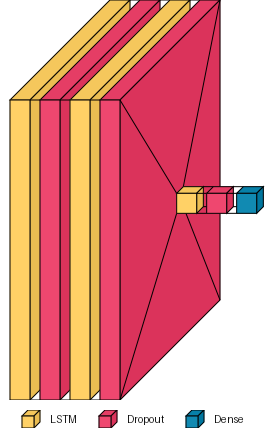

In [59]:
from visualkeras import layered_view
# Visualize the model using layered_view
layered_view(best_model, legend=True, max_xy=300)  # Save to file

In [60]:
import tensorflow as tf
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

# Compile and fit the model
best_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
history=best_model.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])  # Pass early_stopping to callbacks

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 151ms/step - loss: 0.0241 - mean_absolute_error: 0.0987 - val_loss: 0.0023 - val_mean_absolute_error: 0.0355
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 0.0013 - mean_absolute_error: 0.0259 - val_loss: 0.0041 - val_mean_absolute_error: 0.0507
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - loss: 0.0013 - mean_absolute_error: 0.0258 - val_loss: 0.0029 - val_mean_absolute_error: 0.0450
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 162ms/step - loss: 0.0012 - mean_absolute_error: 0.0251 - val_loss: 0.0019 - val_mean_absolute_error: 0.0324
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 155ms/step - loss: 9.8677e-04 - mean_absolute_error: 0.0226 - val_loss: 0.0024 - val_mean_absolute_error: 0.0371
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - loss: 9.5691e-04 - mean_absolute_error: 0.0223 - val_loss: 0.0036 - val_mean_absolute_error: 0.0516
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0012 - mean_absolute_err

In [61]:
train_mae = history.history['mean_absolute_error'] # Get training MAE values from the history
val_mae = history.history['val_mean_absolute_error'] # Get validation MAE values from the history

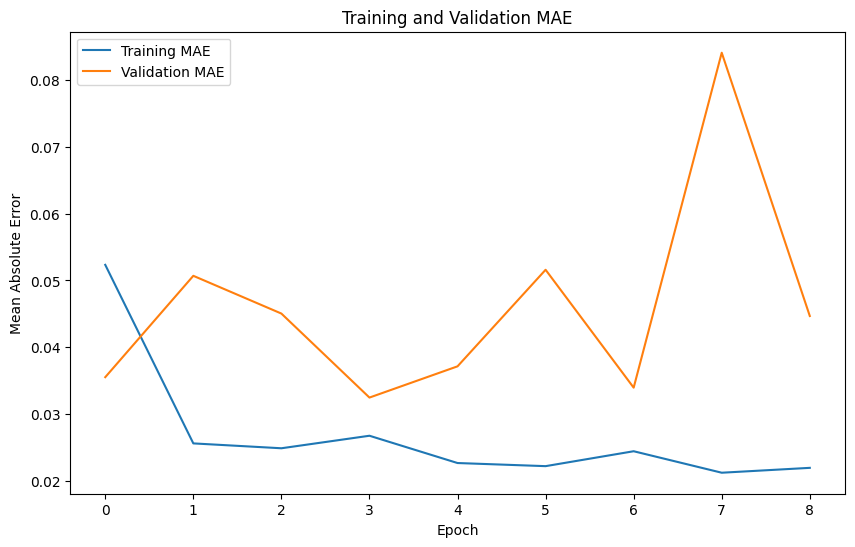

In [62]:
#  Plot training and validation MAE for the best model
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(train_mae, label='Training MAE') # Plot training MAE
plt.plot(val_mae, label='Validation MAE') # Plot validation MAE
plt.title('Training and Validation MAE') # Set the title of the plot
plt.xlabel('Epoch') # Set the x-axis label
plt.ylabel('Mean Absolute Error') # Set the y-axis label
plt.legend() # Display legend
plt.show() # Display the plot

In [63]:
y_pred

array([[2121.3213],
       [2124.5176],
       [2128.9062],
       ...,
       [3578.4033],
       [3572.0176],
       [3566.5225]], dtype=float32)

In [64]:
 y_train

array([0.00831216, 0.01134473, 0.0136016 , ..., 1.        , 0.99001783,
       0.99171788])

In [65]:
y_test

array([[2204.96044922],
       [2313.90307617],
       [2313.90307617],
       ...,
       [3543.94995117],
       [3403.14990234],
       [3299.39990234]])

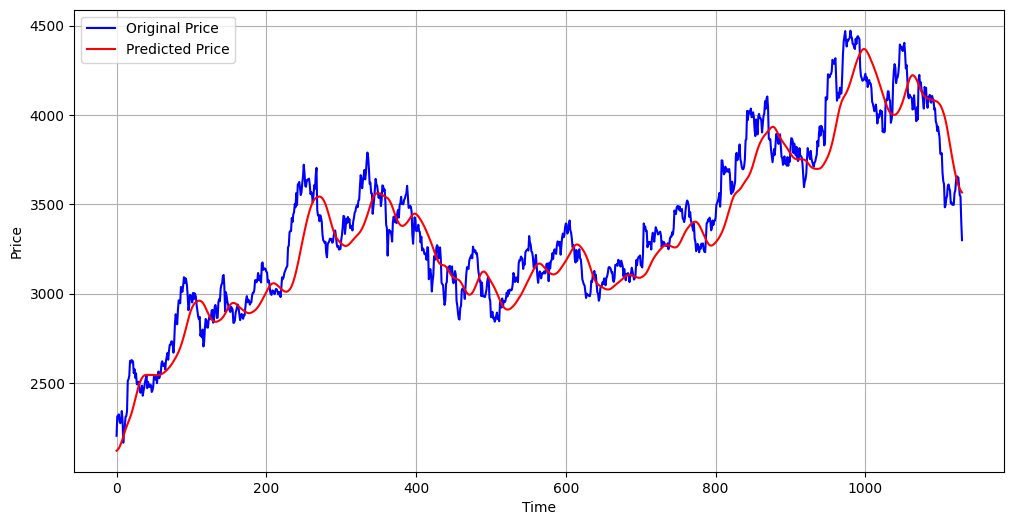

In [66]:
# Plot original and predicted prices
plt.figure(figsize = (12,6)) # Set the figure size
plt.plot(y_test, 'b', label = "Original Price") # Plot the original prices in blue
plt.plot(y_pred, 'r', label = "Predicted Price") # Plot the predicted prices in red
plt.xlabel('Time') # Set the x-axis label
plt.ylabel('Price') # Set the y-axis label
plt.legend() # Display legend
plt.grid(True) # Display grid
plt.show() # Display the plot

# Model Evaluation

In [67]:
from sklearn.metrics import mean_absolute_error # Import mean_absolute_error for model evaluation

mae = mean_absolute_error(y_test, y_pred) # Calculate MAE between original and predicted prices
mae_percentage = (mae / np.mean(y_test)) * 100 # Calculate MAE as a percentage of the average original price
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage)) # Print the MAE percentage

Mean absolute error on test set: 3.74%


In [68]:
# Make predictions using the best model
y_pred = best_model.predict(x_test)

###
y_pred = scaler.inverse_transform(y_pred)

# Evaluate the model (e.g., calculate R-squared, MAE)
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step
R-squared: 0.9291132479206167
Mean Absolute Error: 98.57626024094303


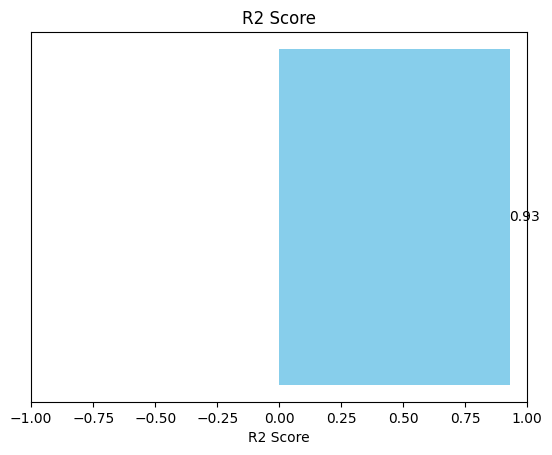

In [69]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

In [70]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [71]:
!pip install h5py

# Saving the Best Model

In [72]:
# Save the model
model.save('best_lstm_model.h5')

In [75]:
from tensorflow import keras

model.save('best_lstm_model.keras')

# Future Predictions Based on User Input-How many future days he want to predict

In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from tensorflow import keras
import datetime

# Load the saved model
model = load_model('best_lstm_model.keras',compile=False)

# Function to predict future stock prices
def predict_future_stocks(data, days_to_predict):
    """
    Predicts future stock prices using the loaded LSTM model.

    Args:
        data: A pandas DataFrame containing the historical stock data.
        days_to_predict: The number of days to predict into the future.

    Returns:
        A pandas DataFrame containing the predicted stock prices with dates.
    """

    # Get the last 100 days of closing prices
    last_100_days = data['Close'][-100:].values.reshape(-1, 1)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(last_100_days)

    # Make predictions for the specified number of days
    predictions = []
    for _ in range(days_to_predict):
        # Reshape the input data for the model
        input_data = scaled_data[-100:].reshape(1, 100, 1)

        # Make a prediction
        prediction = model.predict(input_data)[0][0]

        # Append the prediction to the list
        predictions.append(prediction)

        # Update the scaled data with the prediction
        scaled_data = np.append(scaled_data, [[prediction]], axis=0)

    # Inverse transform the predictions to get the actual stock prices
    predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    # Generate future dates starting from the last date in the data
    last_date = pd.to_datetime(data.index[-1])
    future_dates = [last_date + datetime.timedelta(days=i + 1) for i in range(days_to_predict)]

    # Create a DataFrame with dates and predicted prices
    predicted_df = pd.DataFrame({'Date': future_dates, 'Predicted Stock Price': predicted_prices.flatten()})
    predicted_df.set_index('Date', inplace=True)

    return predicted_df

# Load your historical stock data
data = pd.read_csv('TCS_no_header.csv', skiprows=2)  #
data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
data = data.set_index('Date')

# Get user input for the number of days to predict
days_to_predict = int(input("Enter the number of days to predict: "))

# Make predictions
predicted_df = predict_future_stocks(data, days_to_predict)

# Print the predicted DataFrame
print("Predicted Stock Prices:")
predicted_df.head(days_to_predict)

Enter the number of days to predict: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Stock Prices:


,Predicted Stock Price
Date,
2025-04-05,3627.919434
2025-04-06,3623.789551
2025-04-07,3619.699707
2025-04-08,3615.831055
2025-04-09,3612.360352
2025-04-10,3609.422607
2025-04-11,3607.104492
2025-04-12,3605.447754
2025-04-13,3604.448242
